## Introduction: 

I want this document to serve as a reference for a variety of RF properties of our system. Results, Conclusions, and Notes on Measurement are included for all tests. At the end the findings of the measurements are compared to the Cascade Analysis. Click on the Table of Contents to navigate the document. 

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import subprocess
import math
import pandas as pd
import csv
from IPython.display import Image
import pylab
import skrf as rf

# Plotting 
import matplotlib.ticker as mtick
%matplotlib inline
import mpld3
# mpld3.enable_notebook() # Disable this with: mpld3.disable_notebook() for better performance with histograms and some plots.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

## Useful Functions:

In [66]:
def FFSA_to_pd(Input,Output):
    """
    This function takes a .csv (Input) as is automatically output from the Field Fox in Spectrum Analyzer (SA) 
    mode and converts it to a .csv (Output) that can easily be converted into a pandas df with index: "Freq","Power". 
    """
    startrow = ["Freq","Power","na","na","na"]
    with open(Input, 'r') as inp, open(Output, 'w') as out:
        writer = csv.writer(out)
        for row in csv.reader(inp):
            if row[0][0] == "!": continue
            if row[0][0] == "B": 
                writer.writerow(startrow)
                continue
            if row[0][0] == "E": continue
            writer.writerow(row)       

Conventions for Document: 

* Info on the conditions and parameters of the specific measurement are written in comments below where the file is read. 
* Info on the premise of each measurement is under the: "Notes on Measurement" section. 
* FF = Field Fox. SA = Spectrum Analyzer. NA = Network Analyzer.

Questions/Further Measurements to Consider: 

* Do other side of Am Rec gain test (UinUout)?
* Double check that the freq bin width was in fact 7.5 kHz for the small BW noise floor measurement. 


# Table of contents
1. [Reflection and Transmission of Waveguide Assembly Without Gain](#1) 
    1. [Loss as a function of Quarter Wave Plate (QWP) Configuration](#1A)
    2. [Loss From Al Box Feedthrough to Twist](#1B)
2. [Gain of Low Temp LNA chain](#2)
3. [Investigating Gain, Mixing, and Noise Floor out of Ambient Reciever](#3)
    1. [Gain up to ADC input as Function of Frequency](#3A)
    2. [Mixing Down of Frequency](#3B)
    3. [ADC Input Noise Density](#3C)
    4. [Expected SNR](#3D)
4. [Comparisons to Cascade Analysis](#4)
5. [Reference Measurements that Come in Handy](#5)

# 1) Reflection and Transmission of Waveguide Assembly Without Gain <a name="1"></a>

## A) Loss as a function of Quarter Wave Plate (QWP) Configuration <a name="1A"></a>

**Results:**

QWPs Parallel: 

|  |I out| U out|
|--- | --- | ---|
| I in   |-2.5 dB | -25.7 dB   |
| U in  | -25.7 dB       | -2.5 dB  |

QWPs Orthogonal: 

|  |I out| U out|
|--- | --- | ---|
| I in   | -25.7 dB | -2.5 dB  |
| U in  | -2.5 dB      | -25.7 dB  |

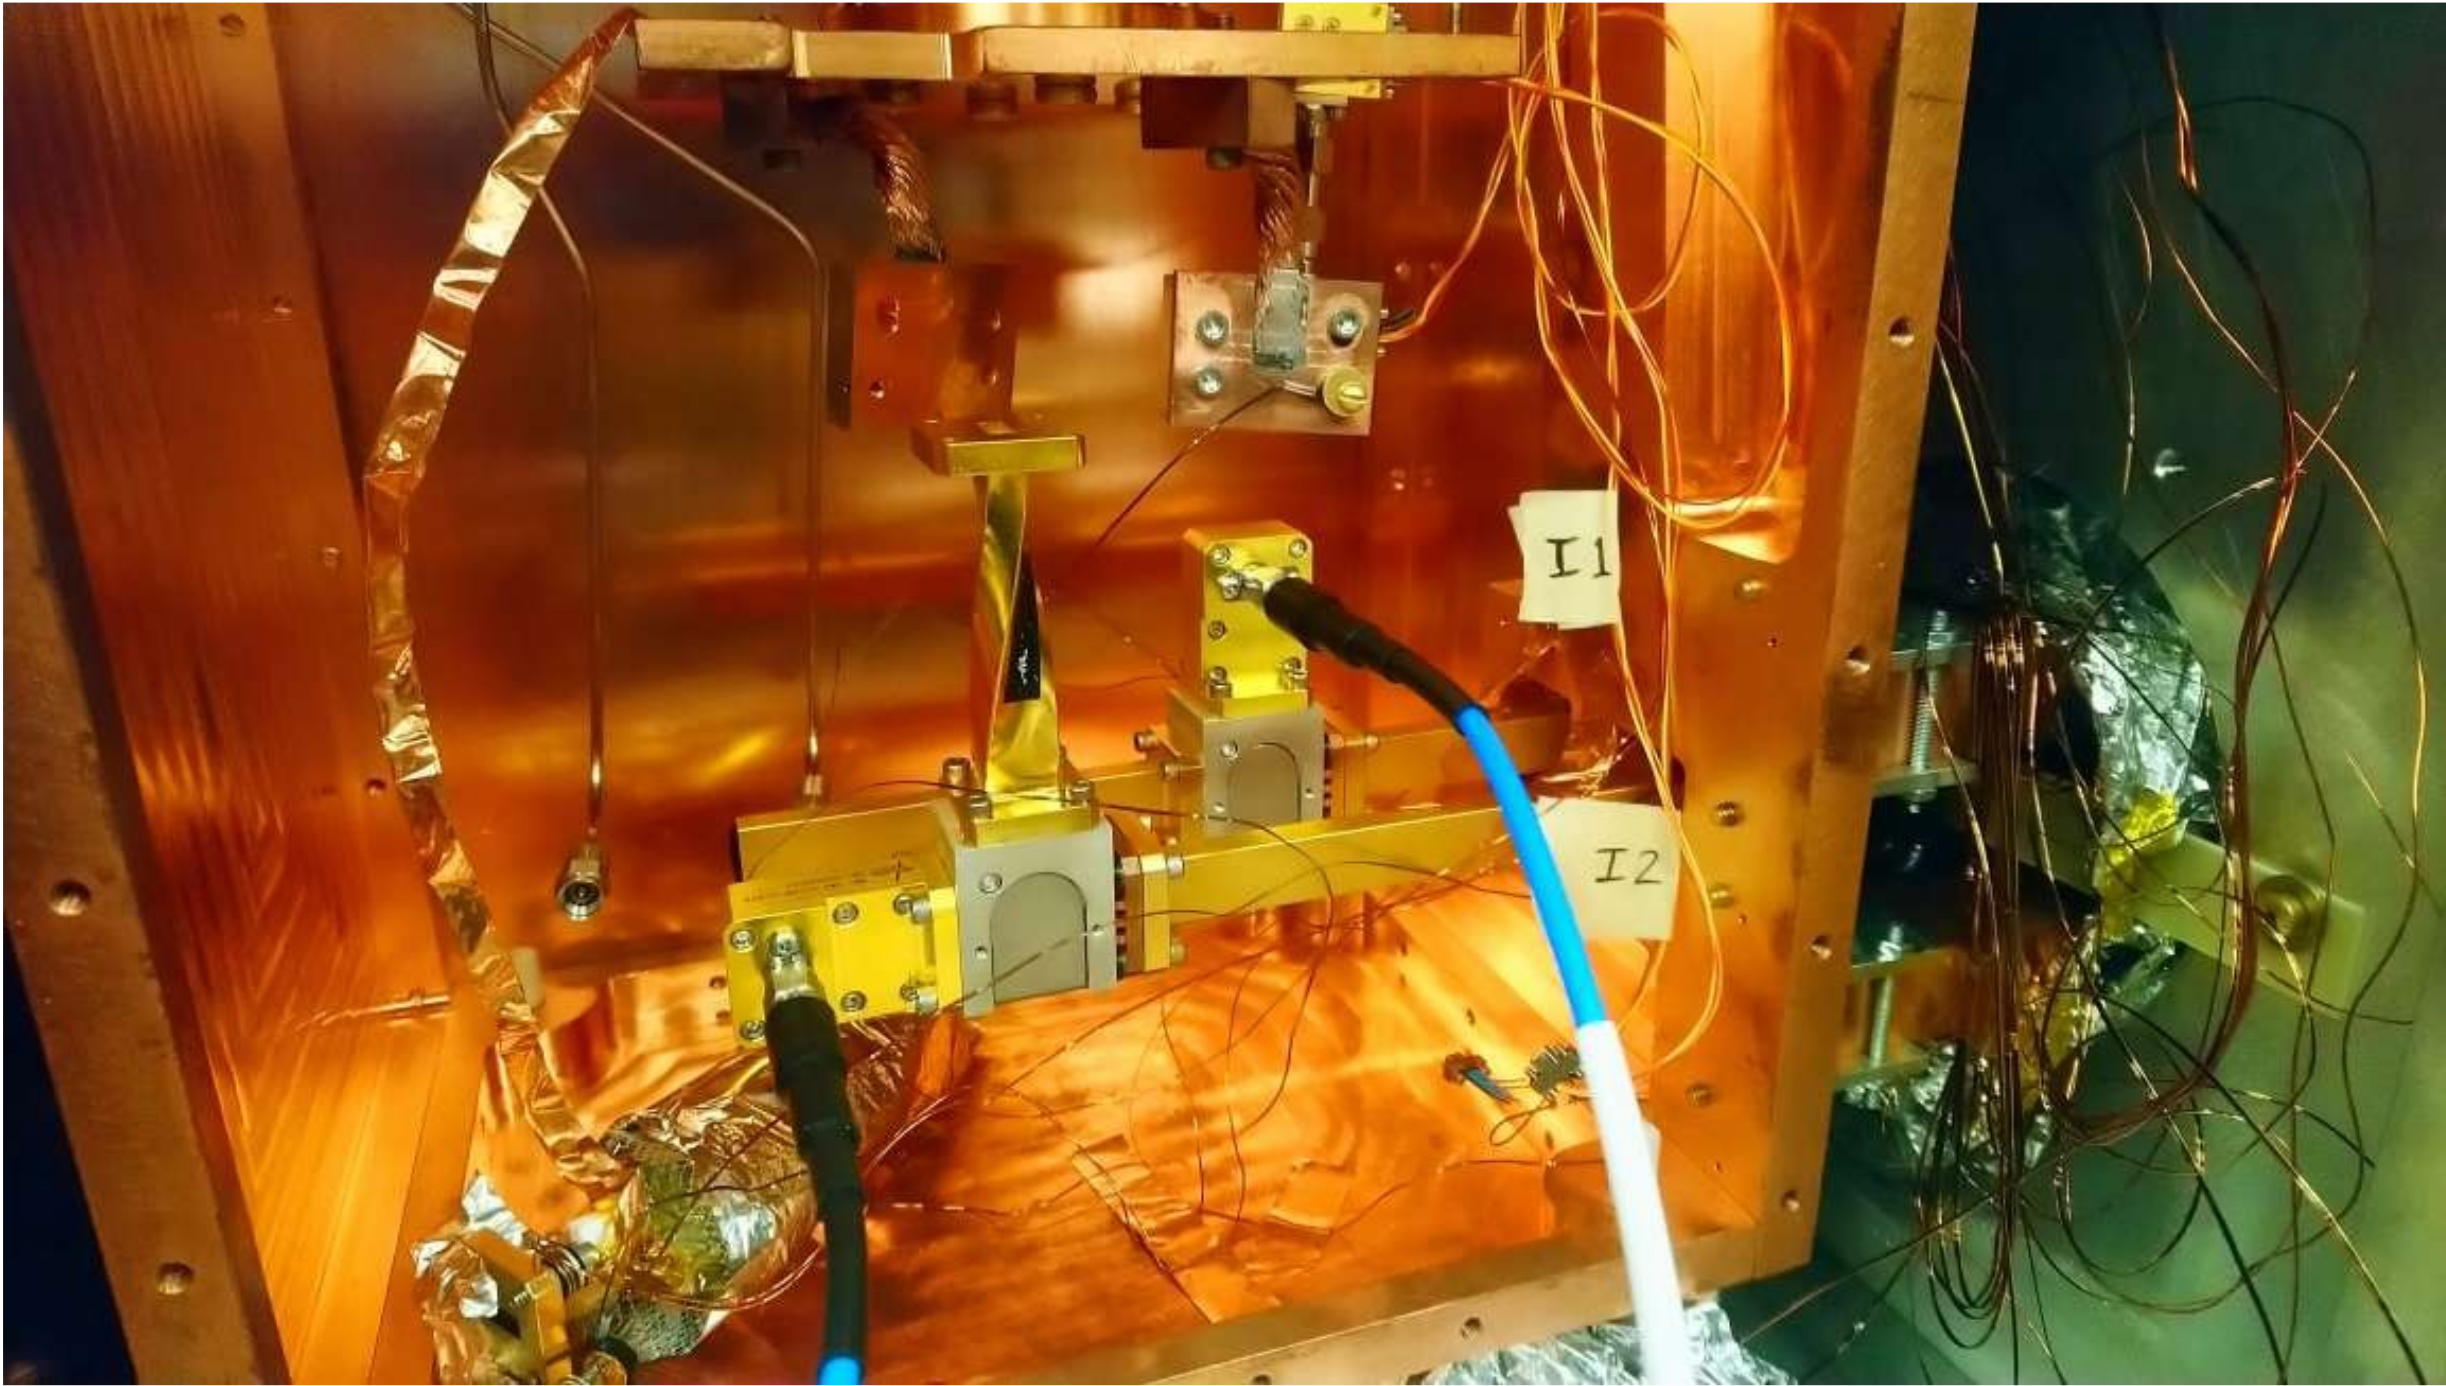

In [56]:
# Example of what measuring I in, U out looks like:
Image(filename='Images/IinUout.png', width = 400, height = 200) 

**Conclusions:**

* The QWPs reflect if Parallel and transmit if Orthogonal as we expected. 
* There is symmetry in the loss. The U-side does not see more loss even though it is a longer path. 
* The reflected signals travel through 4 QWPs (two on the way in, two on the way out) and the transmitted signals travel through 2 QWPs (two as they pass through). And yet the loss for these respective actions is roughly the same. This leads to the understanding that the QWP is not very lossy. 
* The loss experienced by a CRES event originating in the decay cell is (approx.) half of the loss of a transmitted signal. 
    * -2.5 dB = 10**-.25 = .56, half the loss implies: (1-.56)/2 = .22 -> 1-.22 = .78 = -1.08 dB. 
    * For the purposes of the rest of the document I will use **-1 dB as the loss of a CRES event from the decay cell to the start of the amplifier chain (the output of the twist).**


**Notes on Measurement:** 

* Conducted by Heather. 
* The above table is corrected for cable loss and waveguide to coax adapter loss. 
    * Loss due to two face-to-face waveguide to coax adapters plus two blue coax cables: -4.28 dB.
    * See RF_GainTests_Summer2020.pynb for this measurent. 
* Were these just averaged by eye over our bandwidth? Talk to Heather. 

## B) Loss From Al Box Feedthrough to Twist <a name="1B"></a>

**Results:**

* U in, U out of twist. Meaning: Loss from the Al Box Feedthrough, through SS cable, and reflected back from QWPs, to the end of the WR-42 twist: **-25.0 dB**. 

**Conclusions:**

* From this measurement in conjunction with the 1A) measurement we conclude that the difference in power between a CRES event and a signal inserted to the Al Box feedthrough in either the U or the I-side (symmetric loss) is: ~ **-24.0 dB**.
    * As an example: If you insert a -100 dBm signal into U-in, this is equivalent to a -124 dBm CRES event (originating in the decay cell).


**Notes on Measurement:** 

* Conducted by Heather and Drew. 
* Note that this is an average loss over 19-20 GHz for U in, U out of twist. We should perhaps redo this over the whole 18-20 GHz bandwidth and also on the I-side the next time we open the vacuum system. 
* There are 20 dB cold attenuators that cause this extra 20 dB of loss. The rest comes from the imperfect reflection, the SS cables, and the circulators.
* See RF_GainTests_Summer2020/Tests_11092020/S21_UINUTWOUT"data".s2p for this measurent. Note that the actual mean of this measurement was -29 dB, with 4.0 dB of cable loss. 
* See Section 5) for a cable loss measurement. 

# 2) Gain of Low Temp LNA Chain(s) <a name="2"></a>

**Results:**

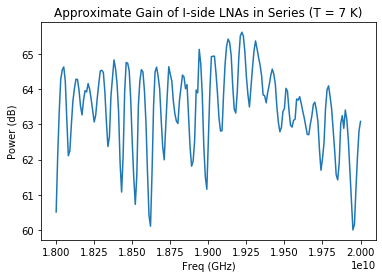

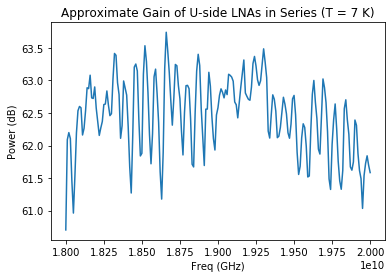

Approximate Gain of I-side LNAs in Series (T = 7 K)=> 63.451704871936286
Approximate Gain of U-side LNAs in Series (T = 7 K)=> 62.463152237103884


In [57]:
IInIout_AlBox = rf.Network('FieldFox_092120/IinIout_AlBox.Sep.2020.17.35.s2p')  
# S21 of Iin Iout into Al box. Note that there was an extra -20 dB atten. This is accounted for with FFCalibration. 
UInUout_AlBox = rf.Network('FieldFox_092120/UinUout_AlBox.Sep.2020.17.25.s2p')  
# S21 of Uin Uout into Al box. Note that there was an extra -20 dB atten. This is accounted for with FFCalibration.
FFCalibration = rf.Network('FieldFox_092120/S21_CAL_11.Sep.2020.12.36.s2p') 
# Configuration: Cables with the attenuator used for gain measurements. Unfortunately only taken in 19-20 GHz.  

IInIout_AlBox_s21 = IInIout_AlBox.s_db[:,1,0] 
UInUout_AlBox_s21 = UInUout_AlBox.s_db[:,1,0]
FFCalibration_s21 = FFCalibration.s_db[:,1,0]

LossToLNAs = 25.0
LossFFCalibration = -FFCalibration_s21.mean()

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Approximate Gain of I-side LNAs in Series (T = 7 K)")

plt.plot(IInIout_AlBox.f, IInIout_AlBox_s21 + LossToLNAs + LossFFCalibration )
plt.show()

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Approximate Gain of U-side LNAs in Series (T = 7 K)")

plt.plot(UInUout_AlBox.f, UInUout_AlBox_s21 + LossToLNAs + LossFFCalibration )
plt.show()

print("Approximate Gain of I-side LNAs in Series (T = 7 K)=>", IInIout_AlBox_s21.mean() + LossToLNAs + LossFFCalibration )
print("Approximate Gain of U-side LNAs in Series (T = 7 K)=>", UInUout_AlBox_s21.mean() + LossToLNAs + LossFFCalibration )


**Conclusions:**

* Approximate Gain of I-side LNAs in Series (T = 7 K) = 63.5 dB
* Approximate Gain of U-side LNAs in Series (T = 7 K) = 62.5 dB

**Notes on Measurement:** 

* Conducted by Drew. 
* Princliple of measurement: 
    * Gain through entire RF system (within Al Box) + Loss from Al Input Feedthrough to plane of LNA (25 dB). There is still some loss inherent to the SS cable coming out of the LNA chain that is not accounted for. So likely this is a slight underestimate (perhaps by 1 dB or so) of the gain. 
* V_ds, I_ds set to part specific data sheet values (see shared 6He CRES google drive). 
    * U-Side: 1st Stage: **.5 V, 8 mA** 2nd Stage: **.6 V, 8 mA**
    * I-Side: 1st Stage: **1 V, 12 mA** 2nd Stage: **1 V, 12 mA**

# 3) Investigating Gain, Mixing, and Noise Floor out of Ambient Reciever <a name="3"></a>

## A) Gain up to ADC input as Function of Frequency <a name="3A"></a>

**Results:**

In [58]:
mylist = ["2B","2C","2D","2E","2F","2G","2H","2I","2J","2K", "2L", "2M", "2N", "2O","2P", "2Q", "2R", "2S", "2T", "2U", "2V"]

for index,value in enumerate(mylist):
    output = "FieldFox_092120/18_{}.csv".format(index)
    FFSA_to_pd("FieldFox_092120/"+value+".csv",output)

In [59]:
# Gain Dependence out of Ambient Reciever as a Function of Frequency: 

# Vaunix Input Power (Roughly -80 dBm):

VaunInPower_092120 = pd.read_csv('FieldFox_092120/VaunixInputPower_Minus80dBm.csv')['Power'].max() 
# Power out of Vaunix signal that was input to the Al Box Feedthrough. 

GainList_092120 = np.array([]) # List of Gains for 18-20 GHz inputs (.1-2.1 GHz outputs) in 100 MHz steps.
for i in range(20):
    GainList_092120 = np.append(GainList_092120,pd.read_csv('FieldFox_092120/18_{}.csv'.format(i))['Power'].max()-VaunInPower_092120)

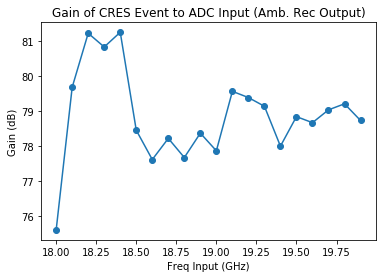

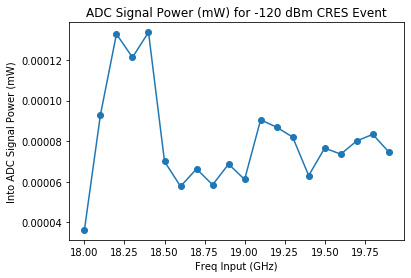

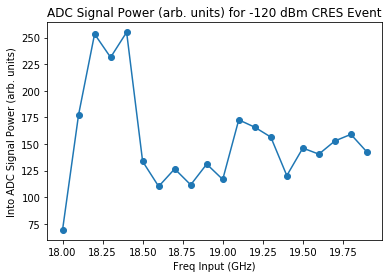

Average Total Gain for CRES Event to ADC Input: 78.87038049697874


5.663019180297795

In [70]:
LossToDecayCell = 24 # (dB) See 1B) for explanation.  
GainPower_dB_092120 = GainList_092120 + LossToDecayCell

# Signal Gains (dB)
mpld3.disable_notebook()
plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq Input (GHz)', fontsize = 10)
plt.ylabel('Gain (dB)')
plt.title("Gain of CRES Event to ADC Input (Amb. Rec Output)")
plt.plot(np.arange(18,20,.1),GainPower_dB_092120,marker = "o") # Change to .1 to 2 
plt.show()

# Signal Powers (mW)
CRESPower_dBm = 120 #(dBm)
GainPower_mW_092120 = 10**((-120+GainPower_dB_092120)/10) # 

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq Input (GHz)', fontsize = 10)
plt.ylabel('Into ADC Signal Power (mW)')
plt.title("ADC Signal Power (mW) for -120 dBm CRES Event")
plt.plot(np.arange(18,20,.1),GainPower_mW_092120,marker = "o") # Change to .1 to 2 
plt.show()

# Convert this to an arbitrary 0 to 255 scale: (For comparison with Brent's measurements)

ConversionFactor = (255/(GainPower_mW_092120.max()))

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq Input (GHz)', fontsize = 10)
plt.ylabel('Into ADC Signal Power (arb. units)')
plt.title("ADC Signal Power (arb. units) for -120 dBm CRES Event")
plt.plot(np.arange(18,20,.1),GainPower_mW_092120*ConversionFactor,marker = "o") # Change to .1 to 2 
plt.show()

print("Average Total Gain for CRES Event to ADC Input:", GainList_092120.mean() + LossToDecayCell)


**Conclusions:**

* Approximate Total Gain of CRES event: 78.9 dB.
* Max Total Gain - Min Total Gain = 5.7 dB. 

**Notes on Measurement:** 

* Conducted by Drew. 
* Princliple of measurement: 
    * Signals 18-20 GHz (100 MHz steps) were injected into the Al Box via the Vaunix at a fixed power (given by VaunInPower_092120) and recieved by the FF in the Spectrum Analyzer (SA) Mode. Signals were input and output from the I-side only. Subtracting In from Out (powers) returns the signal gain. Then the difference between the input power and a CRES signal's power (24 dB, see 1B) was applied to get the total gain of a CRES event.  
    * Then this gain was applied to a theoretical -120 dBm signal to create plots 2,3.
* Avg Count = 1 in SA mode of FF. So no noise averaging should be done by FF.
* **May want to repeat this measurement for the U-side.** 

## B) Mixing Down of Frequency <a name="3B"></a>

**Results:**

In [71]:
FinalFreqDiff = np.array([])

for i in range(20):   
    index = pd.read_csv('FieldFox_092120/18_{}.csv'.format(i))['Power'].idxmax()
    FinalFreq = pd.read_csv('FieldFox_092120/18_{}.csv'.format(i))['Freq'][index]
    FinalFreqDiff = np.append(FinalFreqDiff, ((18.0+i/10)*10**9 - FinalFreq))
    
print("Avg Mixing Frequency:", FinalFreqDiff.mean()*10**-9, "GHz")
print("Standard Deviation of Mixing Frequency:", FinalFreqDiff.std(), "Hz")

Avg Mixing Frequency: 17.9000383575 GHz
Standard Deviation of Mixing Frequency: 405.23468509001054 Hz


**Conclusions:**

* Frequency Mixing is stable over our frequency bandwidth. 

**Notes on Measurement:** 

* Conducted by Drew. 
* Princliple of measurement: 
    * Calculate the difference between the input freq and output freq over all 20 tests. (18-20 GHz input,.1-2.1 GHz output, 100 MHz steps)
* Avg Count = 1 in SA mode of FF. So no averaging should be done by FF.

## C) ADC Input Noise Density <a name="3C"></a>

**Results:**

In [72]:
FFSA_to_pd("FieldFox_092120/2W.csv", "FieldFox_092120/AmRecNoiseFloor_FullBW.csv")
FFSA_to_pd("FieldFox_092120/2Y.csv", "FieldFox_092120/AmRecNoiseFloor_SmallBW.csv")
FFSA_to_pd("FieldFox_092120/2A_21.Sep.2020.17.59.csv", "FieldFox_092120/VaunixInputPower_Minus80dBm.csv")

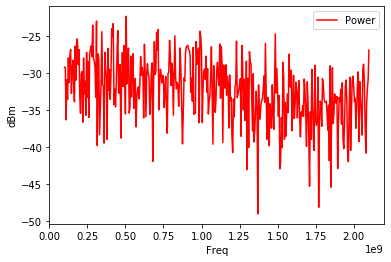

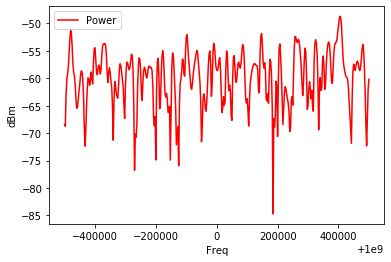

ADC Input Noise Density -99.43551675257874  dBm/Hz
ADC Input Noise Density -98.79875767125651  dBm/Hz
Average of two measurements:  -99.11713721191762  dBm/Hz


In [73]:
AmRecNoiseFloor_FullBW = pd.read_csv('FieldFox_092120/AmRecNoiseFloor_FullBW.csv')
# Noise Floor out of Ambient Rec as seen by the FF, looking at entire .1-2.1 GHz BW. 5 MHz Freq Bin Width

AmRecNoiseFloor_SmallBW = pd.read_csv('FieldFox_092120/AmRecNoiseFloor_SmallBW.csv')
# Noise Floor out of Ambient Rec as seen by the FF, centered at 1 GHz with 1 MHz span. 7.5 kHz Freq Bin Width 

ax0 = AmRecNoiseFloor_FullBW.plot(kind='line',x='Freq',y='Power',color='red', title = '')
ax0.set(ylabel="dBm")
ax1 = AmRecNoiseFloor_SmallBW.plot(kind='line',x='Freq',y='Power',color='red', title = '')
ax1.set(ylabel="dBm")

plt.show()

# Convert to a Noise Floor in dBm/Hz. 5MHz/1 Hz in dB is: 10*log(5*10^6) = 66.99 ~ 67 dB
ApproxNoiseFloor1_dBmPerHz = AmRecNoiseFloor_FullBW['Power'].mean()-10*np.log10(5e6)
ApproxNoiseFloor2_dBmPerHz = AmRecNoiseFloor_SmallBW['Power'].mean()-10*np.log10(7.5e3)

print("ADC Input Noise Density",ApproxNoiseFloor1_dBmPerHz, " dBm/Hz")
print("ADC Input Noise Density",ApproxNoiseFloor2_dBmPerHz, " dBm/Hz")
print("Average of two measurements: ",(ApproxNoiseFloor1_dBmPerHz + ApproxNoiseFloor2_dBmPerHz)/2, " dBm/Hz")


**Conclusions:**

* Approximate ADC Input Noise Density: -99.1 dBm/Hz

**Notes on Measurement:** 

* Conducted by Drew. 
* Princliple of measurement: 
    * Measure the Noise Floor out of Ambient Reciever in  FF SA mode (for I-side only) with LNAs ON with two different bandwidths (consistency check). When you unplug the LNAs the noise floor drops many tens of dB so we are definitely probing our noise floor and not the Vaunix or FF noise floor. 
* Two measurements are not as consistent as I would hope, though this is likely due to a frequency dependence of the gain, the narrower BW inevitably had a slightly different average gain and therefor average Noise Density. 
* Avg Count = 1 in SA mode of FF. So no averaging should be done by FF. 
* **May want to repeat this measurement for the U-side.** 

## D) Expected SNR <a name="3D"></a>

**Results:**

In [64]:
# Using same set of data as 1A)

FreqBinWidth = 1.7e5 #(Hz)
CRESPower = VaunInPower_092120 - 24
ADCThermalNoiseDensity = -99.1 # (dBm/Hz)
ADCPerChannelNoisePower = ADCThermalNoiseDensity + 10*np.log10(FreqBinWidth)
 

SNR_092120 = np.array([]) # List of CRES SNRs for 18-20 GHz inputs (.1-2.1 GHz outputs) in 100 MHz steps.
for i in range(20):
    SNR_092120 = np.append(SNR_092120,pd.read_csv('FieldFox_092120/18_{}.csv'.format(i))['Power'].max() - ADCPerChannelNoisePower ) # (dB)
    
# Now convert this SNR to a -120 dBm CRES Signal. Note you assume linear response in power to do this.
ConversionFactor = CRESPower +120 
SNR_092120 = SNR_092120 - ConversionFactor

print("Avgerage SNR for -120 dBm CRES Event:", SNR_092120.mean(), " dB")
print("Std Dev:", SNR_092120.std(), " dB")
print("ADC Per Channel Noise Power for 170 kHz bin: ", ADCPerChannelNoisePower, " dBm")

Avgerage SNR for -120 dBm CRES Event: 5.665891283195977  dB
Std Dev: 1.2886297594829395  dB
ADC Per Channel Noise Power for 170 kHz bin:  -46.79551078621725  dBm


**Conclusions:**

* Avgerage SNR for -120 dBm CRES Event: 5.7 +- 1.3 dB
* ADC Per Channel Noise Power for 170 kHz bin: -46.8 dBm

**Notes on Measurement:** 

* Conducted by Drew. 
* Princliple of measurement: 
    * Very Similar to 1A. Signals 18-20 GHz (100 MHz steps) were injected into the Al Box via the Vaunix at a fixed power (given by VaunInPower_092120) and recieved by the FF in the Spectrum Analyzer (SA) Mode. Signals were input and output from the I-side only Subtracting In from Out (powers) returns the signal gain. Then the difference between the input power and a CRES signal's power (24 dB, see 1B) was applied to get the effective CRES power being injected. Then the SNR for that CRES power was found based on the ADCPerChannelNoise. Then a conversion factor was subtracted from this to effectively convert the injected signal to a -120 dBm CRES event. 
* Avg Count = 1 in SA mode of FF. So no averaging should be done by FF.
* This result assumes a DAQ with linear response to power.
* Note that a standard deviation of a value expressed in dB doesn't really make sense, but it gives us a sense. 

# 4) Comparisons to Cascade Analysis <a name="4"></a>

Parameters Input to the Cascade Analysis: 

* CRES signal power = -120 dBm 
* Cryogenic Stage Gain (both together) = 63 dB
* Loss in Waveguide (Conservative based on above tests) = -2 dB
* Terminator Temp = 28 K 
* FFT Channel Bandwidth (Hz) = 1.70E+05 

**Results:**

|  |Cascade Analysis| Measured Value|
|--- | --- | ---|
| Full Reciever Gain (dB)  |77.7 | 78.9  |
| ADC Input Noise Density (dBm/Hz)  | -101.5      | -99.1   |
| Integrated Noise Power to ADC (dBm) | -48.8  | -46.8  |
| SNR for RMS thermal noise (dB)(for -120 dBm signal)  | 6.44  | 5.7   |


Conclusions: 

* Relative agreement for these parameters. 
* The reason the gain is lower closer to 18 GHz is due to the high pass filter.  

Notes: 

* I don't know how Johnathan is calculating: Packet Avg. DAQ Output Noise Power in 1 Ch (dBm). 
* Of course there is a frequency dependence that this is leaving out. And it does seem that we need to be concerned with it. 
* The cascade analysis does predict a roughly 3 dB difference in total gain between 18 GHz and 19 GHz. We are seeing more like 5.7 dB. 

# 5) Reference Measurements that Come in Handy <a name="5"></a>

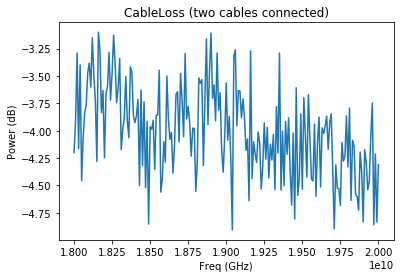

CableLoss: -4.004196812606535  dB


In [114]:
CableLoss = rf.Network('FieldFox_092120/CableLoss.s2p') 
# Configuration: Just the two cables used in many of above connected together with a double-sided male sma coax adapter.  

CableLoss_s21 = CableLoss.s_db[:,1,0]


plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("CableLoss (two cables connected)")

plt.plot(UInUout_AlBox.f,CableLoss_s21)
plt.show()


print("CableLoss:",CableLoss_s21.mean(), " dB")